#Import Necessary libraries¶ 




In [146]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import panel as pn
from sklearn.cluster import KMeans
import math
import holoviews as hv

#Load the data 

In [148]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)
data

,BSQ,DSA,YMQ,FTW,EHT,IFI,ZSJ,IZX,RAN,PFQ,...,CGV,HTF,ZYT,CYK,YGE,ZMY,DMN,HZQ,GNL,FZI
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1042,1161,0,75,83,74,0,77,1686,77,...,827,78,73,771,86,0,1965,52,72,81
2021-01-02,790,1109,0,64,61,85,0,90,2470,70,...,720,96,64,768,58,0,1807,70,73,76
2021-01-03,798,848,0,63,80,66,0,79,2022,63,...,702,74,77,736,56,0,1848,62,66,72
2021-01-04,816,947,0,67,67,108,0,79,2049,85,...,580,90,57,646,61,0,1638,76,77,53
2021-01-05,681,1050,0,69,55,67,0,76,2105,39,...,666,97,94,661,81,0,1680,71,71,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,767,995,43,82,69,60,119,0,1530,75,...,669,0,0,477,0,92,1595,56,78,93
2021-12-28,726,889,92,76,72,89,0,0,1630,75,...,662,0,0,598,0,83,1767,82,80,100
2021-12-29,835,1033,56,66,74,111,109,0,1589,63,...,750,0,0,623,0,92,1667,67,80,75


In [149]:
marketing=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletMarketing.csv', index_col=0)
marketing

,Marketing (£)
Id,
BSQ,27000
DSA,35000
YMQ,1000
FTW,3000
EHT,3000
IFI,3000
ZSJ,2000
IZX,2000
RAN,70000


In [150]:
overheads=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletOverheads.csv',index_col=0)
overheads

,Overheads (£)
Id,
BSQ,69000
DSA,46000
YMQ,97000
FTW,72000
EHT,13000
IFI,63000
ZSJ,91000
IZX,80000
RAN,16000


In [151]:
size=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletSize.csv',index_col=0)
size

,Size (msq)
Id,
BSQ,2493
DSA,2596
YMQ,20
FTW,150
EHT,257
IFI,83
ZSJ,45
IZX,113
RAN,5849


In [152]:
staff=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletStaff.csv',index_col=0)
staff


,Staff
Id,
BSQ,25
DSA,19
YMQ,1
FTW,2
EHT,2
IFI,1
ZSJ,1
IZX,2
RAN,33


#Data Understanding

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   BSQ     365 non-null    int64
 1   DSA     365 non-null    int64
 2   YMQ     365 non-null    int64
 3   FTW     365 non-null    int64
 4   EHT     365 non-null    int64
 5   IFI     365 non-null    int64
 6   ZSJ     365 non-null    int64
 7   IZX     365 non-null    int64
 8   RAN     365 non-null    int64
 9   PFQ     365 non-null    int64
 10  NFH     365 non-null    int64
 11  RFY     365 non-null    int64
 12  PLB     365 non-null    int64
 13  DHJ     365 non-null    int64
 14  MTE     365 non-null    int64
 15  LTU     365 non-null    int64
 16  DTO     365 non-null    int64
 17  EEC     365 non-null    int64
 18  END     365 non-null    int64
 19  EYS     365 non-null    int64
 20  AGN     365 non-null    int64
 21  GFA     365 non-null    int64
 22  DZZ     365 non-null    int64
 23  CTH 

In [154]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, BSQ to FZI
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Marketing (£)  45 non-null     int64
dtypes: int64(1)
memory usage: 720.0+ bytes


In [155]:
overheads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, BSQ to FZI
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Overheads (£)  45 non-null     int64
dtypes: int64(1)
memory usage: 720.0+ bytes


In [156]:
size.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, BSQ to FZI
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Size (msq)  45 non-null     int64
dtypes: int64(1)
memory usage: 720.0+ bytes


In [157]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, BSQ to FZI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Staff   45 non-null     int64
dtypes: int64(1)
memory usage: 720.0+ bytes


In [158]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)
print(data.sum())
print (data.head())

RAN    738823
RFY    714007
DMN    666555
DSA    361092
EYS    349005
EEC    322503
BSQ    304531
BMF    292059
CGV    263397
CYK    259395
END     34862
OZW     33768
PLB     32720
NFH     31027
DHJ     30875
OTL     30854
LLK     30839
DTO     30836
IFI     30115
FZI     29247
QZF     28600
GNL     27375
EHT     27273
PFQ     26874
LTU     26844
CNW     26614
MZO     25866
FTW     25130
HZQ     24887
NLT     24801
GFA     23165
CTH     22593
MTE     22549
DZZ     22154
YGE     17718
HNV     16024
HTF     15751
XSB     15259
IZX     14549
AYD     12392
ZSJ     10862
YMQ      6710
ZYT      5924
AGN      4306
ZMY      4266
dtype: int64
             RAN   RFY   DMN   DSA   EYS   EEC   BSQ  BMF  CGV  CYK  ...  HNV  \
Date                                                                 ...        
2021-01-01  1686  2017  1965  1161  1007  1020  1042  890  827  771  ...   57   
2021-01-02  2470  2200  1807  1109  1229   928   790  899  720  768  ...   52   
2021-01-03  2022  1854  1848   84

#finding for null values 

In [159]:
print(data.isnull().sum())
print(marketing.isnull().sum())
print(overheads.isnull().sum())
print(size.isnull().sum())
print(staff.isnull().sum())

RAN    0
RFY    0
DMN    0
DSA    0
EYS    0
EEC    0
BSQ    0
BMF    0
CGV    0
CYK    0
END    0
OZW    0
PLB    0
NFH    0
DHJ    0
OTL    0
LLK    0
DTO    0
IFI    0
FZI    0
QZF    0
GNL    0
EHT    0
PFQ    0
LTU    0
CNW    0
MZO    0
FTW    0
HZQ    0
NLT    0
GFA    0
CTH    0
MTE    0
DZZ    0
YGE    0
HNV    0
HTF    0
XSB    0
IZX    0
AYD    0
ZSJ    0
YMQ    0
ZYT    0
AGN    0
ZMY    0
dtype: int64
Marketing (£)    0
dtype: int64
Overheads (£)    0
dtype: int64
Size (msq)    0
dtype: int64
Staff    0
dtype: int64


In [160]:
print(data.isna().sum())
print(marketing.isna().sum())
print(overheads.isna().sum())
print(size.isna().sum())
print(staff.isna().sum())

RAN    0
RFY    0
DMN    0
DSA    0
EYS    0
EEC    0
BSQ    0
BMF    0
CGV    0
CYK    0
END    0
OZW    0
PLB    0
NFH    0
DHJ    0
OTL    0
LLK    0
DTO    0
IFI    0
FZI    0
QZF    0
GNL    0
EHT    0
PFQ    0
LTU    0
CNW    0
MZO    0
FTW    0
HZQ    0
NLT    0
GFA    0
CTH    0
MTE    0
DZZ    0
YGE    0
HNV    0
HTF    0
XSB    0
IZX    0
AYD    0
ZSJ    0
YMQ    0
ZYT    0
AGN    0
ZMY    0
dtype: int64
Marketing (£)    0
dtype: int64
Overheads (£)    0
dtype: int64
Size (msq)    0
dtype: int64
Staff    0
dtype: int64


There is no null values 

#EDA

#Line plot 

In [161]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)
data.index = pd.to_datetime(data.index)
print(data.head())

plot = data.hvplot.line(
    frame_height=600, frame_width=600,
    xlabel='Date', ylabel='Daily Customers',
    title='Daily Customers'
)
hv.extension('bokeh')
plot

Output hidden; open in https://colab.research.google.com to view.

#HeatMap correlation of outlet of daily customers  

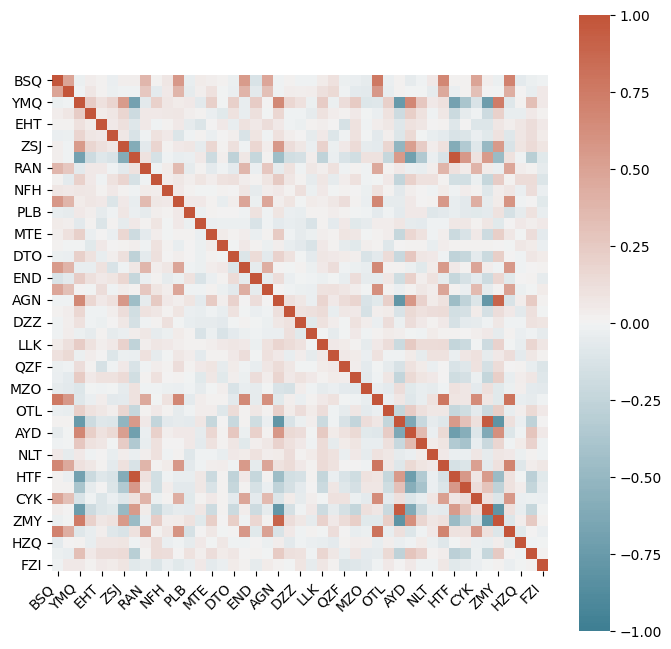

In [162]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)

plt.figure(figsize=(8, 8))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**HeatMap summary correlation**

             BSQ   DSA  YMQ  FTW  EHT  IFI  ZSJ  IZX   RAN  PFQ  ...  CGV  \
Date                                                             ...        
2021-01-01  1042  1161    0   75   83   74    0   77  1686   77  ...  827   
2021-01-02   790  1109    0   64   61   85    0   90  2470   70  ...  720   
2021-01-03   798   848    0   63   80   66    0   79  2022   63  ...  702   
2021-01-04   816   947    0   67   67  108    0   79  2049   85  ...  580   
2021-01-05   681  1050    0   69   55   67    0   76  2105   39  ...  666   

            HTF  ZYT  CYK  YGE  ZMY   DMN  HZQ  GNL  FZI  
Date                                                      
2021-01-01   78   73  771   86    0  1965   52   72   81  
2021-01-02   96   64  768   58    0  1807   70   73   76  
2021-01-03   74   77  736   56    0  1848   62   66   72  
2021-01-04   90   57  646   61    0  1638   76   77   53  
2021-01-05   97   94  661   81    0  1680   71   71  100  

[5 rows x 45 columns]
     Marketing  Overhead

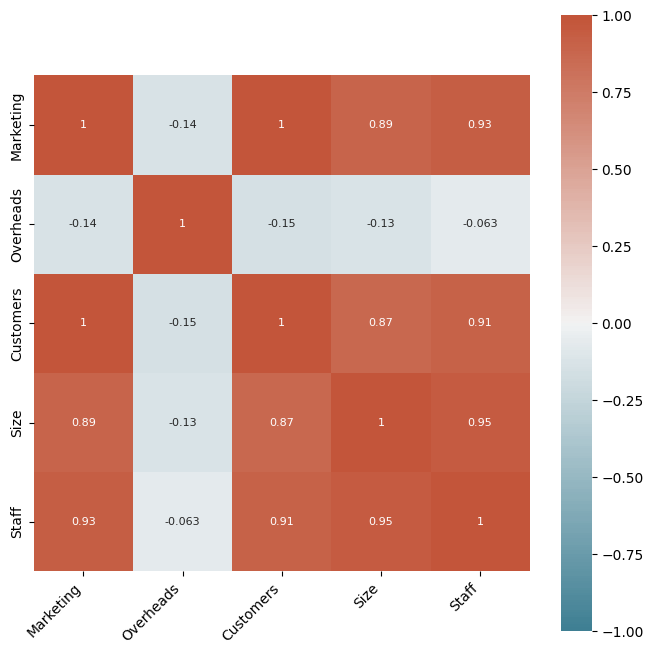

In [163]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
print(data.head())

marketing=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletMarketing.csv', index_col=0)
overheads=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletOverheads.csv',index_col=0)
size=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletSize.csv',index_col=0)
staff=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletStaff.csv',index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['Marketing'] = marketing.values
summary_data['Overheads'] = overheads.values
summary_data['Customers'] = data.sum().values
summary_data['Size'] = size.values
summary_data['Staff'] = staff.values
print(summary_data.head())

plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#Bar chat 

Product BSQ is Medium volume
Product DSA is Medium volume
Product YMQ is Very Low volume
Product FTW is Low volume
Product EHT is Low volume
Product IFI is Low volume
Product ZSJ is Low volume
Product IZX is Low volume
Product RAN is High volume
Product PFQ is Low volume
Product NFH is Low volume
Product RFY is High volume
Product PLB is Low volume
Product DHJ is Low volume
Product MTE is Low volume
Product LTU is Low volume
Product DTO is Low volume
Product EEC is Medium volume
Product END is Low volume
Product EYS is Medium volume
Product AGN is Very Low volume
Product GFA is Low volume
Product DZZ is Low volume
Product CTH is Low volume
Product LLK is Low volume
Product OZW is Low volume
Product QZF is Low volume
Product CNW is Low volume
Product MZO is Low volume
Product BMF is Medium volume
Product OTL is Low volume
Product HNV is Low volume
Product AYD is Low volume
Product XSB is Low volume
Product NLT is Low volume
Product CGV is Medium volume
Product HTF is Low volume
Product 

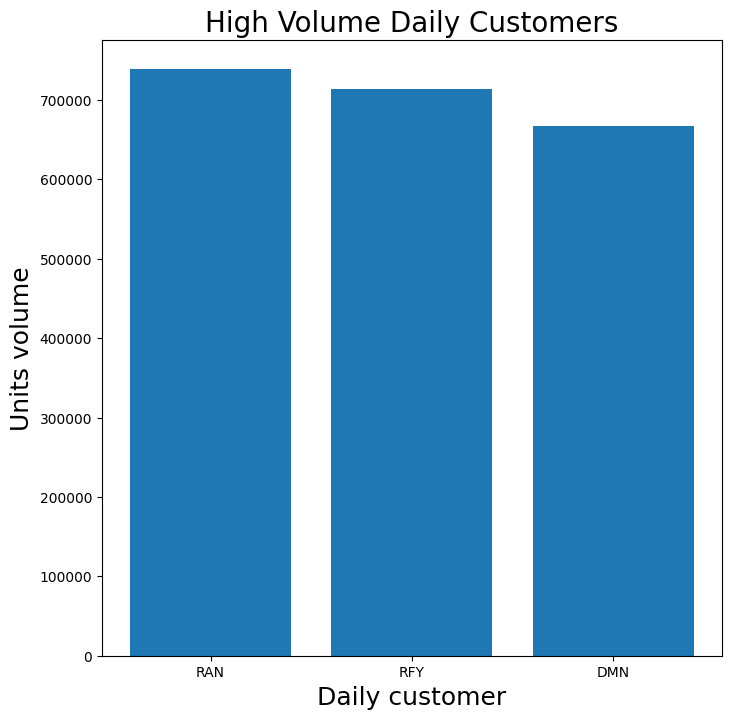

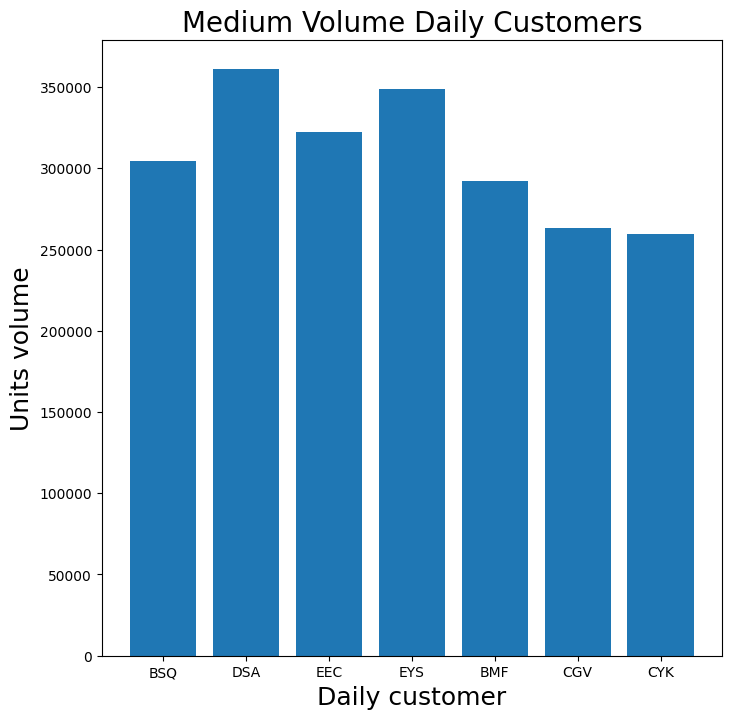

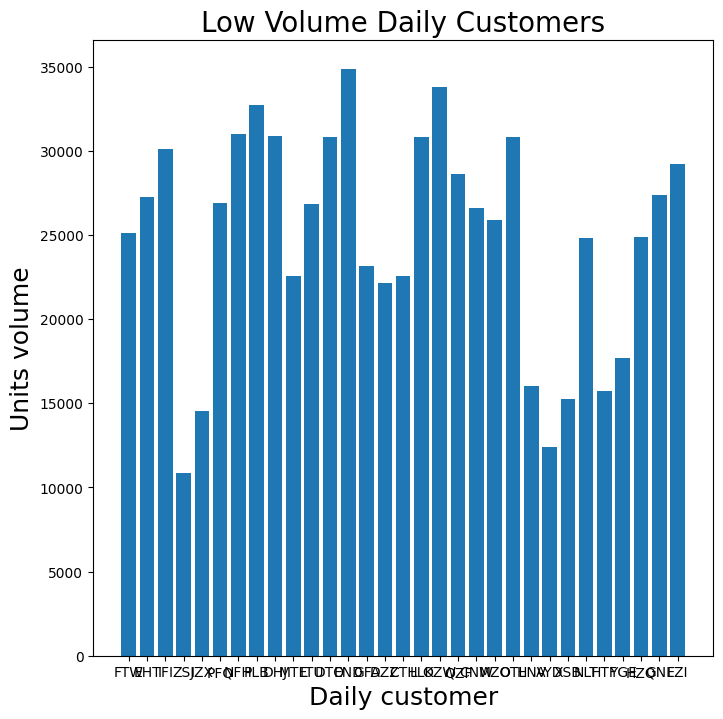

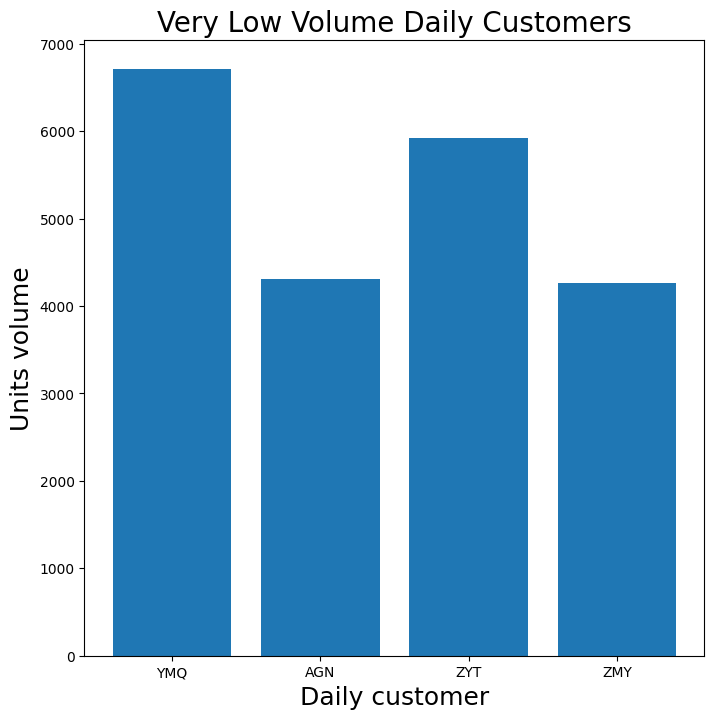

In [164]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)

categories = ['High', 'Medium', 'Low', 'Very Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_sales = data[name].sum()
    if total_sales > 600000:
        category = 0
    elif total_sales > 200000:
        category = 1
    elif total_sales >10000:
        category = 2
    else:
        category = 3
    categories_selected[category].append(name)
    print('Product ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Daily customer', fontsize=18)
    plt.ylabel('Units volume', fontsize=18)
    plt.title(categories[i] + ' Volume Daily Customers', fontsize=20)
    plt.show()

#Correlegram all attributes

     Marketing  Overheads  Customers  Size  Staff
BSQ      27000      69000     304531  2493     25
DSA      35000      46000     361092  2596     19
YMQ       1000      97000       6710    20      1
FTW       3000      72000      25130   150      2
EHT       3000      13000      27273   257      2
          Marketing     Overheads      Customers         Size      Staff
count     45.000000     45.000000      45.000000    45.000000  45.000000
mean   11311.111111  58977.777778  112555.466667   666.200000   6.177778
std    17907.365450  29275.718211  191964.906633  1132.302714   8.663636
min     1000.000000  13000.000000    4266.000000    17.000000   1.000000
25%     2000.000000  33000.000000   22154.000000   101.000000   1.000000
50%     3000.000000  63000.000000   27273.000000   208.000000   2.000000
75%     4000.000000  86000.000000   33768.000000   302.000000   4.000000
max    70000.000000  99000.000000  738823.000000  5849.000000  33.000000


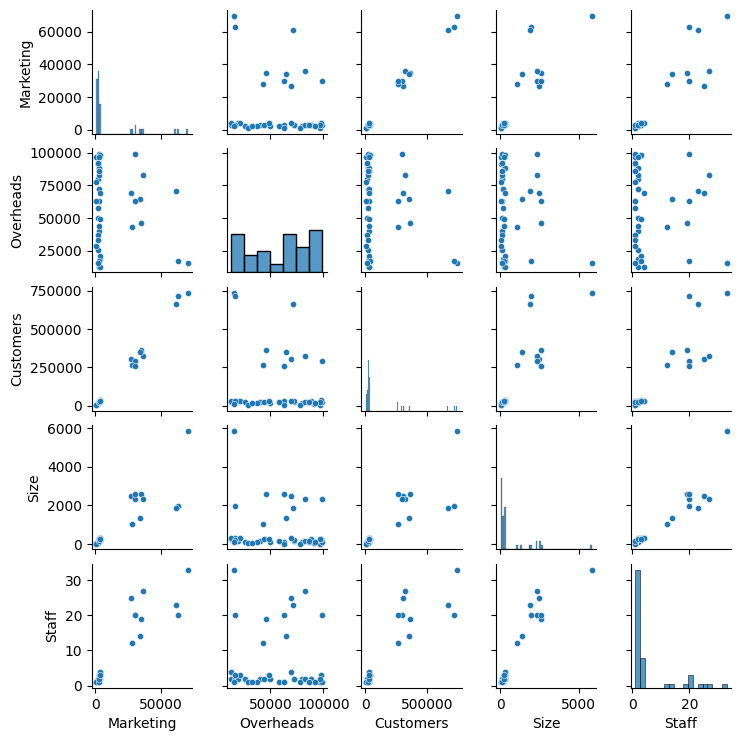

In [165]:
marketing=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletMarketing.csv', index_col=0)
overheads=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletOverheads.csv',index_col=0)
size=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletSize.csv',index_col=0)
staff=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletStaff.csv',index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['Marketing'] = marketing.values
summary_data['Overheads'] = overheads.values
summary_data['Customers'] = data.sum().values
summary_data['Size'] = size.values
summary_data['Staff'] = staff.values
print(summary_data.head())
print(summary_data.describe())

sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

#Bar chat with colours 

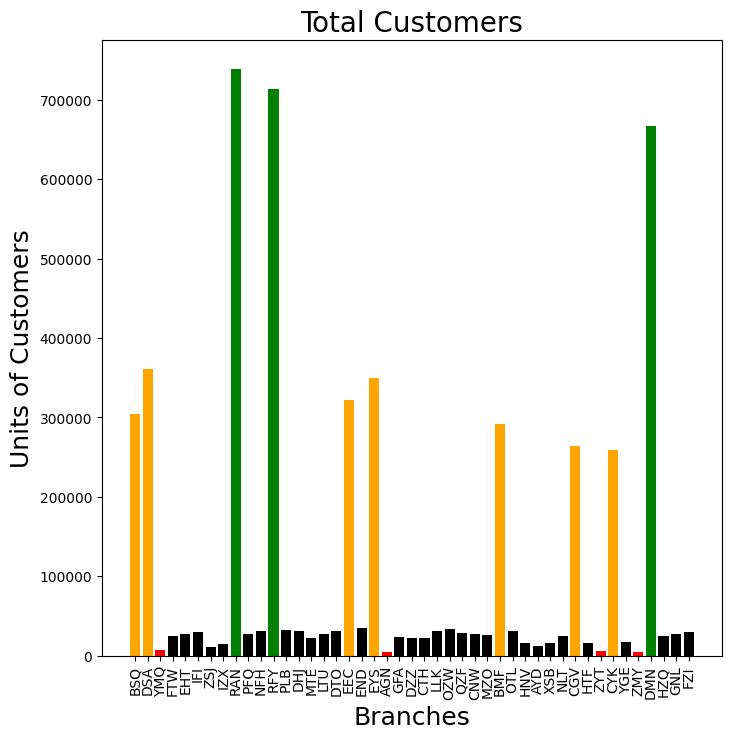

In [166]:
colours = []
for name in data.columns:
    total_sales = data[name].sum()
    if total_sales > 600000: 
        colour = 'green'
    elif total_sales >200000 : 
        colour = 'orange'
    elif total_sales > 10000 : 
        colour = 'black'
    else:
        colour =  'red'  
    colours.append(colour)

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center', color=colours)
plt.xticks(x_pos, data.columns, rotation=90) 
plt.xlabel('Branches', fontsize=18) 
plt.ylabel('Units of Customers', fontsize=18) 
plt.title('Total Customers', fontsize=20) 
plt.show()

In [167]:


data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)
data.index = pd.to_datetime(data.index)
print(data.head())

selected = ['RAN', 'RFY', 'DMN']

plot = data[selected].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Units sold per day', ylabel='Frequency',
    title='High Volume Products',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
plot

Output hidden; open in https://colab.research.google.com to view.

#Pie chat 

             BSQ   DSA  YMQ  FTW  EHT  IFI  ZSJ  IZX   RAN  PFQ  ...  CGV  \
Date                                                             ...        
2021-01-01  1042  1161    0   75   83   74    0   77  1686   77  ...  827   
2021-01-02   790  1109    0   64   61   85    0   90  2470   70  ...  720   
2021-01-03   798   848    0   63   80   66    0   79  2022   63  ...  702   
2021-01-04   816   947    0   67   67  108    0   79  2049   85  ...  580   
2021-01-05   681  1050    0   69   55   67    0   76  2105   39  ...  666   

            HTF  ZYT  CYK  YGE  ZMY   DMN  HZQ  GNL  FZI  
Date                                                      
2021-01-01   78   73  771   86    0  1965   52   72   81  
2021-01-02   96   64  768   58    0  1807   70   73   76  
2021-01-03   74   77  736   56    0  1848   62   66   72  
2021-01-04   90   57  646   61    0  1638   76   77   53  
2021-01-05   97   94  661   81    0  1680   71   71  100  

[5 rows x 45 columns]


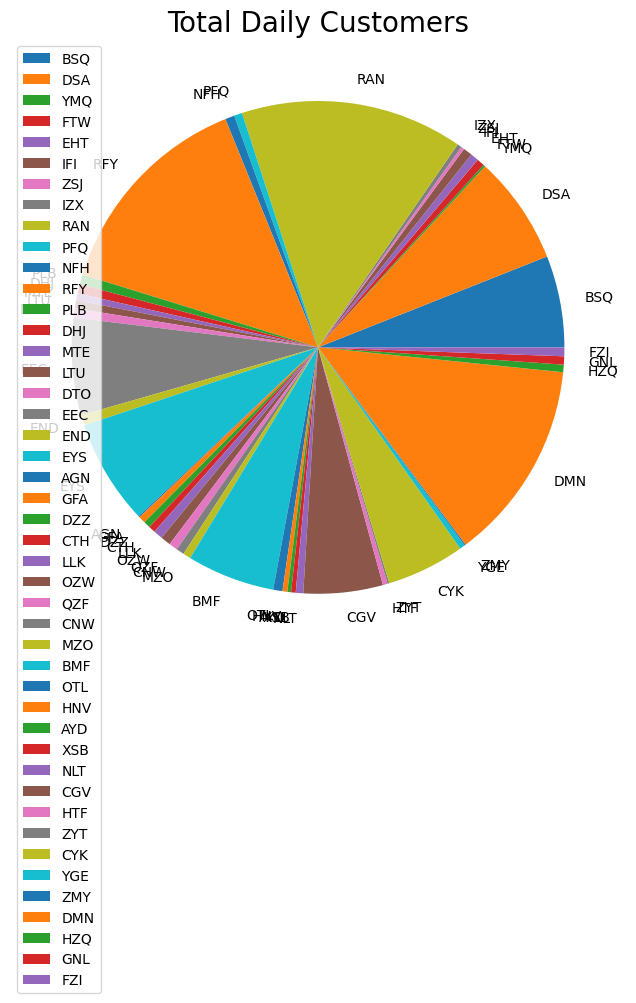

In [168]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)
print(data.head())

plt.figure(figsize=(8, 8))
plt.pie(data.sum(), labels=data.columns)
plt.title('Total Daily Customers', fontsize=20)
plt.legend(loc=2)
plt.show()

#Scatter plot clustering 

             BSQ   DSA  YMQ  FTW  EHT  IFI  ZSJ  IZX   RAN  PFQ  ...  CGV  \
Date                                                             ...        
2021-01-01  1042  1161    0   75   83   74    0   77  1686   77  ...  827   
2021-01-02   790  1109    0   64   61   85    0   90  2470   70  ...  720   
2021-01-03   798   848    0   63   80   66    0   79  2022   63  ...  702   
2021-01-04   816   947    0   67   67  108    0   79  2049   85  ...  580   
2021-01-05   681  1050    0   69   55   67    0   76  2105   39  ...  666   

            HTF  ZYT  CYK  YGE  ZMY   DMN  HZQ  GNL  FZI  
Date                                                      
2021-01-01   78   73  771   86    0  1965   52   72   81  
2021-01-02   96   64  768   58    0  1807   70   73   76  
2021-01-03   74   77  736   56    0  1848   62   66   72  
2021-01-04   90   57  646   61    0  1638   76   77   53  
2021-01-05   97   94  661   81    0  1680   71   71  100  

[5 rows x 45 columns]
     Marketing  Overhead

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


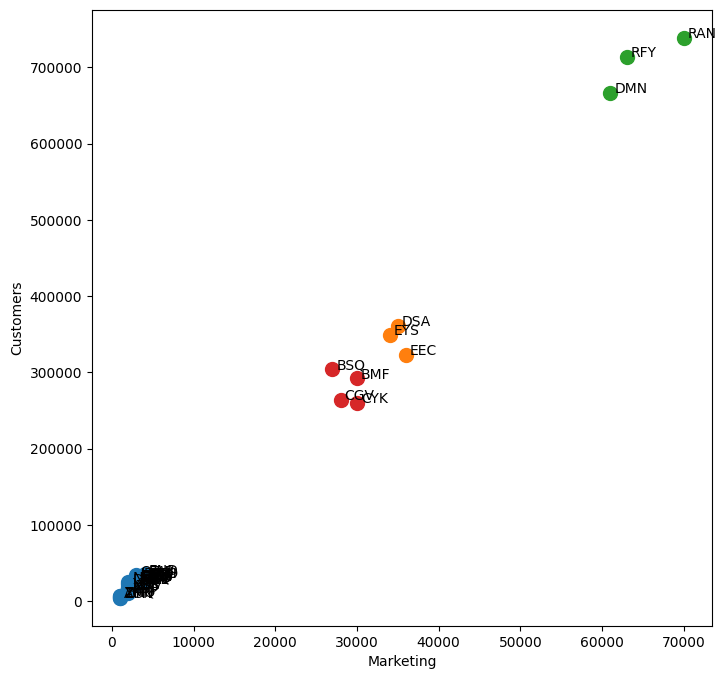

In [169]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletDailyCustomers.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
print(data.head())

marketing=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletMarketing.csv', index_col=0)
overheads=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletOverheads.csv',index_col=0)
size=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletSize.csv',index_col=0)
staff=pd.read_csv('https://tinyurl.com/ChrisCoDV/001272983/OutletStaff.csv',index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['Marketing'] = marketing.values
summary_data['Overheads'] = overheads.values
summary_data['Customers'] = data.sum().values
summary_data['Size'] = size.values
summary_data['Staff'] = staff.values
print(summary_data.head())


k = 4
selected = ['Marketing', 'Customers']
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data[selected])

clusters = []
for c in range(k):
    clusters.append(summary_data[summary_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Marketing'], clusters[c]['Customers'], s=100)
for i, name in enumerate(summary_data.index):
    plt.annotate(name, (summary_data['Marketing'][i] + 500, summary_data['Customers'][i]))
plt.xlabel('Marketing')
plt.ylabel('Customers')
plt.show()

#High volume customer Reader plot

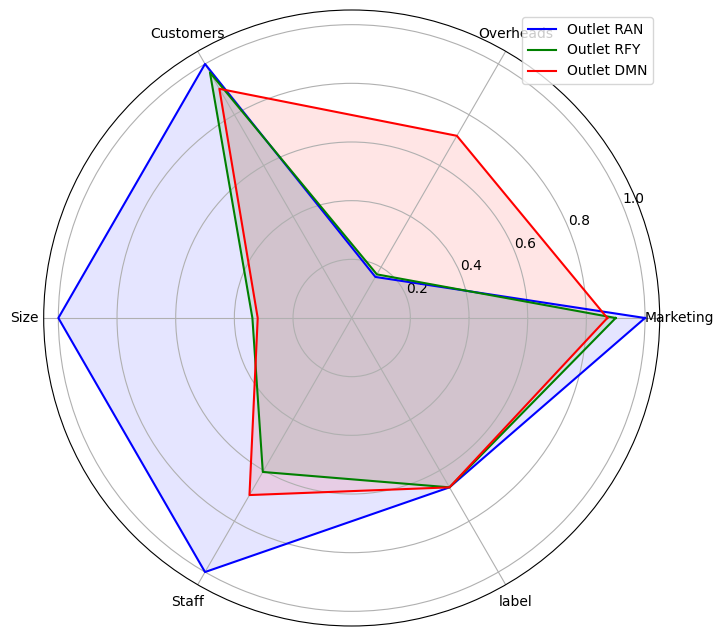

In [170]:
selected = ['RAN','RFY','DMN']
normalised_data = summary_data / summary_data.max()
n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Outlet ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

#Inveractive newly opend outlets


In [171]:
selected = ['YMQ','ZSJ','AGN','AYD','XSB','ZMY']
plot = data[selected].hvplot.line(
frame_height=600, frame_width=600,
    xlabel='Outlets', ylabel='Customers',
    title='Newly opened outlets',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
plot

Output hidden; open in https://colab.research.google.com to view.